In [26]:
from __future__ import division

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import mlib.lib as mlib

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [27]:
data = pd.read_csv('./datasets/bbbDescr.csv')

In [28]:
print data.shape

(208, 135)


In [29]:
data.head(5)

,Unnamed: 0,tpsa,nbasic,negative,vsa_hyd,a_aro,weight,peoe_vsa.0,peoe_vsa.1,peoe_vsa.2,peoe_vsa.3,peoe_vsa.4,peoe_vsa.5,peoe_vsa.6,peoe_vsa.0.1,peoe_vsa.1.1,peoe_vsa.2.1,peoe_vsa.3.1,peoe_vsa.4.1,peoe_vsa.5.1,peoe_vsa.6.1,a_acc,a_acid,a_base,vsa_acc,vsa_acid,vsa_base,vsa_don,vsa_other,vsa_pol,slogp_vsa0,slogp_vsa1,slogp_vsa2,slogp_vsa3,slogp_vsa4,slogp_vsa5,slogp_vsa6,slogp_vsa7,slogp_vsa8,slogp_vsa9,smr_vsa0,smr_vsa1,smr_vsa2,smr_vsa3,smr_vsa4,smr_vsa5,smr_vsa6,smr_vsa7,tpsa.1,logp.o.w.,frac.anion7.,frac.cation7.,andrewbind,rotatablebonds,mlogp,clogp,mw,nocount,hbdnr,rule.of.5violations,alert,prx,ub,pol,inthb,adistm,adistd,polar_area,nonpolar_area,psa_npsa,tcsa,tcpa,tcnp,ovality,surface_area,volume,most_negative_charge,most_positive_charge,sum_absolute_charge,dipole_moment,homo,lumo,hardness,ppsa1,ppsa2,ppsa3,pnsa1,pnsa2,pnsa3,fpsa1,fpsa2,fpsa3,fnsa1,fnsa2,fnsa3,wpsa1,wpsa2,wpsa3,wnsa1,wnsa2,wnsa3,dpsa1,dpsa2,dpsa3,rpcg,rncg,wpcs,wncs,sadh1,sadh2,sadh3,chdh1,chdh2,chdh3,scdh1,scdh2,scdh3,saaa1,saaa2,saaa3,chaa1,chaa2,chaa3,scaa1,scaa2,scaa3,ctdh,ctaa,mchg,achg,rdta,n_sp2,n_sp3,o_sp2,o_sp3
0,1,12.030000,1,0,167.06700,0,156.293,76.94749,43.44619,0.00000,0.000000,0.00000,0,17.238030,18.74768,43.50657,0,0,0.000000,0.000000,0.000000,0,0,1,0.000000,0,5.682576,5.682576,0.00000,0.00000,18.01075,0.00000,3.981969,0.000,4.410796,32.897190,0,0.00000,113.21040,33.32602,0.000000,18.01075,4.410796,3.981969,0.00000,113.21040,0.000000,66.22321,16.61,2.948,0.000,0.999,3.4,3,2.50245,2.970000,155.285568,1,1,0,0,0,0.0,0,0,0.000000,0.0000,21.124201,379.070190,0.0557,0.0097,0.1842,0.0103,1.0960,400.194397,656.065002,-0.6174,0.3068,3.8918,1.1898,-9.6672,3.4038,6.5355,349.139008,679.383179,30.970501,51.055401,-99.347702,-10.487600,0.8724,1.6976,0.0774,0.1276,-0.2482,-0.0262,139.723495,271.885406,12.394200,20.432100,-39.758400,-4.197100,298.083588,778.731018,41.458000,0.1577,0.3173,2.3805,1.9117,15.098800,15.0988,0.0377,0.3068,0.3068,0.0008,4.632100,4.6321,0.0116,6.025500,6.025500,0.0151,-0.6174,-0.6174,-0.0015,-3.719900,-3.7199,-0.0093,1,1,0.9241,0.9241,1.0000,0.000000,6.0255,0.000000,0.000000
1,2,49.330002,0,0,92.64243,6,151.165,38.24339,25.52006,0.00000,8.619013,23.27370,0,0.000000,49.01962,0.00000,0,0,0.000000,13.566920,7.904431,2,0,0,13.566920,0,0.000000,5.682576,28.10760,13.56692,25.38523,23.26954,23.862220,0.000,0.000000,0.000000,0,70.57274,0.00000,41.32619,23.862220,25.38523,0.000000,5.243428,20.76750,70.57274,5.258784,33.32602,49.33,0.889,0.001,0.000,-3.3,2,1.05973,0.494000,151.166428,3,2,0,0,1,3.0,2,0,395.375702,10.8921,117.408096,247.537094,0.4743,0.0134,0.0417,0.0198,1.1173,364.945312,555.096924,-0.8397,0.4967,4.8925,4.2109,-8.9618,0.1942,4.5780,223.130997,545.832825,42.303001,141.814301,-346.912292,-44.036800,0.6114,1.4957,0.1159,0.3886,-0.9506,-0.1207,81.430603,199.199097,15.438300,51.754398,-126.603996,-16.070999,81.316704,892.745117,86.339798,0.2030,0.3433,1.3116,2.2546,45.216301,22.6082,0.1239,0.7960,0.3980,0.0022,17.619499,8.8098,0.0483,65.623596,32.811798,0.1798,-0.8371,-0.4185,-0.0023,-27.514299,-13.7571,-0.0754,2,2,1.2685,1.0420,1.0000,0.000000,6.5681,32.010201,33.613499
2,3,50.529999,1,0,295.16700,15,366.485,58.05473,124.74020,21.65084,8.619013,17.44054,0,8.619013,83.82487,49.01962,0,0,5.682576,2.503756,2.640647,2,0,1,8.186332,0,0.000000,5.682576,43.56089,0.00000,14.12420,34.79628,0.000000,76.245,3.185575,9.507346,0,148.12580,75.47363,28.27417,12.631660,27.78542,0.000000,8.429003,29.58226,235.05870,76.245000,0.00000,51.73,4.439,0.000,0.986,12.8,8,4.66091,5.136999,365.479401,5,1,1,0,6,5.3,3,0,1364.551392,25.6784,82.094299,637.724182,0.1287,0.0111,0.0972,0.0125,1.3005,719.818481,1224.455322,-0.8012,0.5414,7.9796,3.5234,-8.6271,0.0589,4.3430,517.821777,2066.018555,63.950298,201.996704,-805.931091,-43.758701,0.7194,2.8702,0.0888,0.2806,-1.1196,-0.0608,372.737701,1487.158325,46.032600,145.401001,-580.124084,-31.498301,315.825104,2871.949707,107.708900,0.1357,0.2008,1.1351,1.5725,16.719200,16.7192,0.0232,0.4550,0.4550,0.0006,7.607700,7

In [30]:
data = data.iloc[:, 1:]
predictors = list(data.columns)

In [31]:
print data.dtypes

tpsa                    float64
nbasic                    int64
negative                  int64
vsa_hyd                 float64
a_aro                     int64
weight                  float64
peoe_vsa.0              float64
peoe_vsa.1              float64
peoe_vsa.2              float64
peoe_vsa.3              float64
peoe_vsa.4              float64
peoe_vsa.5              float64
peoe_vsa.6              float64
peoe_vsa.0.1            float64
peoe_vsa.1.1            float64
peoe_vsa.2.1            float64
peoe_vsa.3.1            float64
peoe_vsa.4.1            float64
peoe_vsa.5.1            float64
peoe_vsa.6.1            float64
a_acc                     int64
a_acid                    int64
a_base                    int64
vsa_acc                 float64
vsa_acid                float64
vsa_base                float64
vsa_don                 float64
vsa_other               float64
vsa_pol                 float64
slogp_vsa0              float64
slogp_vsa1              float64
slogp_vs

#### Find columns with NA values. No such columns!

In [32]:
na_names = filter(lambda name: any(data[name].isnull()), data.columns)
print len(na_names)
print na_names

0
[]


#### Look for one value predictors. No one!

In [33]:
one_value_names = filter(lambda name: len(data[name].unique()) == 1, predictors)
print one_value_names

[]


#### Look at degenerative distributions.

In [34]:
deg_names = filter(lambda name: mlib.check_degenerative(data[name]), predictors)

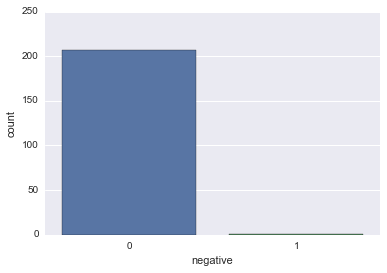

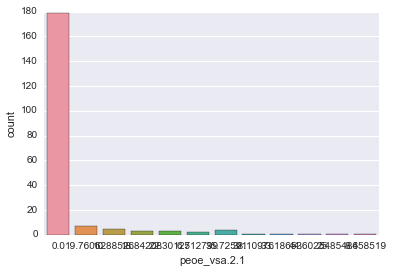

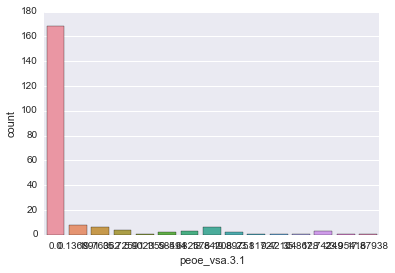

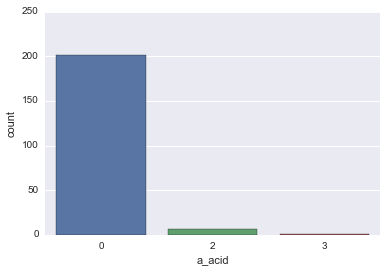

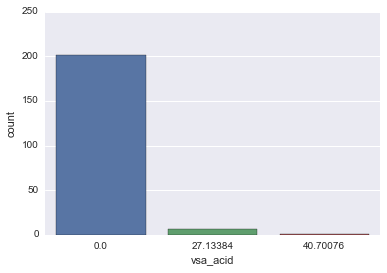

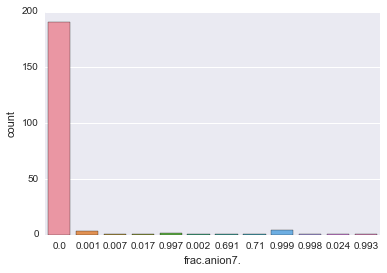

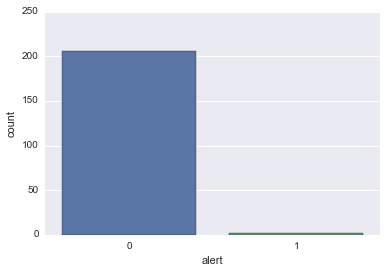

In [35]:
for name in deg_names:
    sns.countplot(data=data, x=name)
    plt.show()

#### Drop them.

In [36]:
data.drop(deg_names, axis=1, inplace=True)
predictors = list(data.columns)

#### Look at int64 vs float64 columns.

In [40]:
int_predictors = filter(lambda name: data[name].dtypes == np.int64, predictors)
float_predictors = filter(lambda name: data[name].dtypes == np.float64, predictors)

Possible strange ints and floats.

In [61]:
int_uniques = map(lambda name: (len(data[name].unique()), name), int_predictors)
float_uniques = map(lambda name: (len(data[name].unique()), name), float_predictors)

for _, name in sorted(int_uniques, key=lambda (v, n): v, reverse=True)[:4]:
    print name
    print data[name].value_counts()
    print
    
for _, name in sorted(float_uniques, key=lambda (v, n): v, reverse=False)[:4]:
    print name
    print data[name].value_counts()
    print


rotatablebonds
2     27
4     26
5     25
8     21
6     21
1     21
3     18
7     15
0     14
9      8
11     4
14     3
10     3
12     2
dtype: int64

a_aro
12    63
6     53
0     18
11    17
5     11
17    10
15    10
18     9
16     7
10     7
9      2
21     1
dtype: int64

prx
0     69
5     38
2     24
6     18
1     17
4     12
3      9
8      7
9      6
12     4
7      4
dtype: int64

nocount
3     51
4     46
5     28
6     27
2     23
7     19
1      6
9      4
8      3
11     1
dtype: int64

vsa_pol
0.00000     161
13.56692     37
27.13384      6
11.36515      4
dtype: int64

vsa_base
0.000000     125
5.682576      31
17.047730     21
11.365150     20
17.742490      6
41.167560      3
58.215280      2
dtype: int64

peoe_vsa.5
0.000000     150
12.949530     35
6.699551       5
14.708500      4
29.417000      3
4.184601       3
25.899060      3
24.140090      2
13.166620      1
21.408050      1
16.745920      1
dtype: int64

vsa_don
0.000000     73
5.682576     51
11.36515

Do nothing with them.

## Correlation search.

In [12]:
corr_mat = data.corr()
corr_mat = mlib.cluster_corr_matrix(corr_mat, clip=True)

#### Some strong clusters.

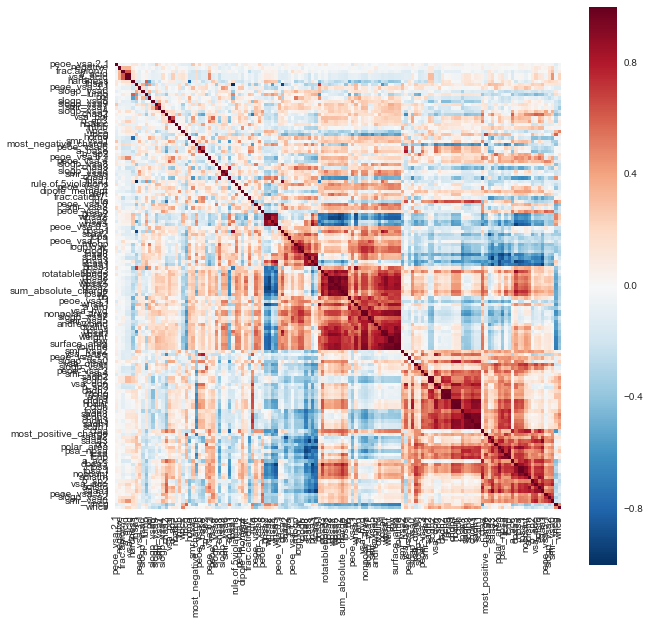

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, square=True)

#### And separate correlation for ints and floats.

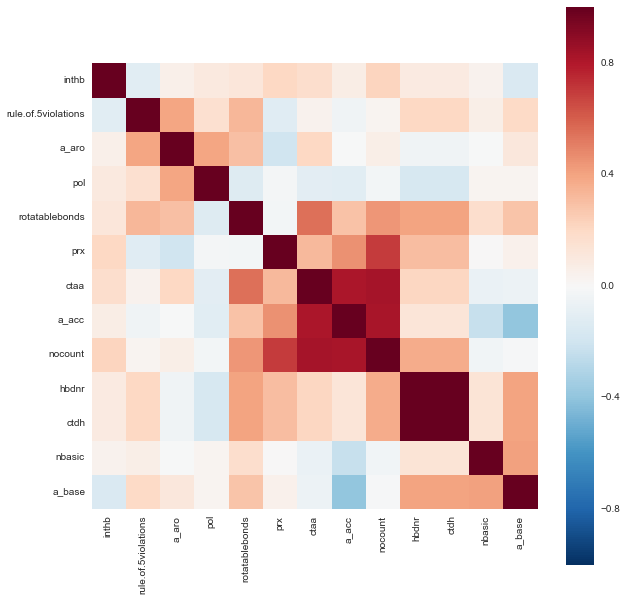

In [62]:
corr_mat_int = data[int_predictors].corr()
corr_mat_int = mlib.cluster_corr_matrix(corr_mat_int, clip=True)

plt.figure(figsize=(10,10))
sns.heatmap(corr_mat_int, square=True)

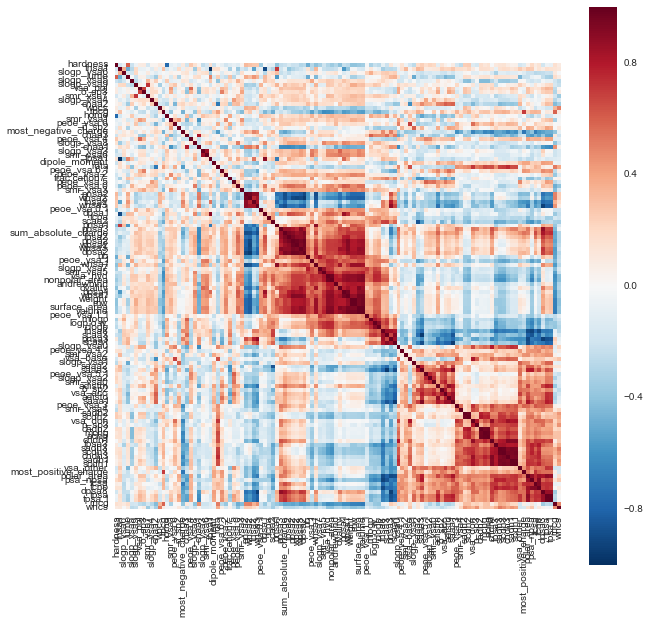

In [63]:
corr_mat_float = data[float_predictors].corr()
corr_mat_float = mlib.cluster_corr_matrix(corr_mat_float, clip=True)

plt.figure(figsize=(10,10))
sns.heatmap(corr_mat_float, square=True)

#### Lets treat all data as floats.

In [65]:
data = data.astype(np.float64)

### Try PCA first.

#### Normalize data.

In [67]:
from sklearn.preprocessing import scale

predictors_norm = map(lambda name: name + '_norm', predictors)
for name in predictors:
    data[name + '_norm'] = scale(data[name])

#### 99% variation explained by 47 variables.

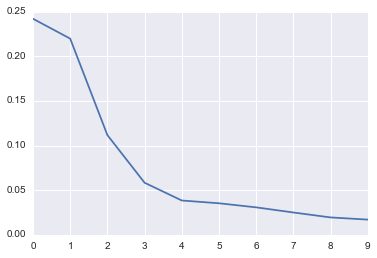

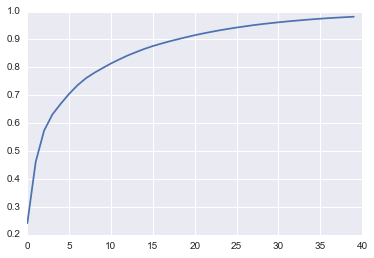

0.990108824154


In [91]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data[predictors_norm])

plt.plot(pca.explained_variance_ratio_[:10])
plt.show()

plt.plot(np.cumsum(pca.explained_variance_ratio_)[:40])
plt.show()
print sum(pca.explained_variance_ratio_[:47])

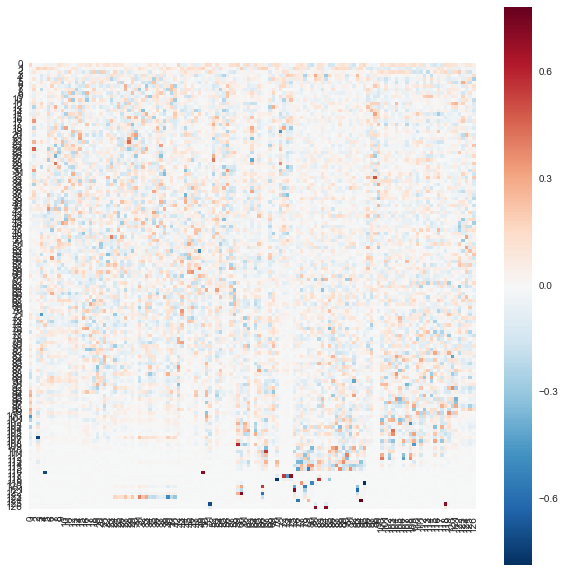

In [99]:
plt.figure(figsize=(10,10))
sns.heatmap(pca.components_, square=True)